In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('climate_action_data.csv')

In [65]:
df = df.drop_duplicates()


In [66]:
df = df.replace('error', None)

In [67]:
df = df[df['Date'].notna()]
df = df[df['Crop_Type'].notna()]

df['Soil_Moisture(%)'] = df['Soil_Moisture(%)'].fillna(pd.to_numeric(df['Soil_Moisture(%)'], errors='coerce').mean())
df['Soil_pH'] = df['Soil_pH'].fillna(pd.to_numeric(df['Soil_pH'], errors='coerce').mean())
df['Temperature(C)'] = df['Temperature(C)'].fillna(pd.to_numeric(df['Temperature(C)'], errors='coerce').mean())
df['Humidity(%)'] = df['Humidity(%)'].fillna(pd.to_numeric(df['Humidity(%)'], errors='coerce').mean())
df['Fertilizer_Recommended(kg/ha)'] = df['Fertilizer_Recommended(kg/ha)'].fillna(pd.to_numeric(df['Fertilizer_Recommended(kg/ha)'], errors='coerce').mean())
df['Irrigation_Recommended(mm)'] = df['Irrigation_Recommended(mm)'].fillna(pd.to_numeric(df['Irrigation_Recommended(mm)'], errors='coerce').mean())


In [68]:
df = df[df['Soil_Moisture(%)'].notna()]
df = df[df['Soil_pH'].notna()]
df = df[df['Temperature(C)'].notna()]
df = df[df['Humidity(%)'].notna()]
df = df[df['Fertilizer_Recommended(kg/ha)'].notna()]
df = df[df['Irrigation_Recommended(mm)'].notna()]



In [69]:
print("\nDescriptive Statistics:")
print(df.describe())

print("\nValue Counts for Crop Types:")
print(df['Crop_Type'].value_counts())

print("\nMissing Values:")
print(df.isnull().sum())

print("\nData Info:")
print(df.info())

print("\nMean, Std, Min, Max for Numeric Columns:")
numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
               'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for col in numeric_cols:
    print(f"\n{col}:")
    print(f"Mean: {pd.to_numeric(df[col], errors='coerce').mean()}")
    print(f"Std: {pd.to_numeric(df[col], errors='coerce').std()}")
    print(f"Min: {pd.to_numeric(df[col], errors='coerce').min()}")
    print(f"Max: {pd.to_numeric(df[col], errors='coerce').max()}")
    
df.info()



Descriptive Statistics:
       Sensor_ID        Date  Soil_Moisture(%) Soil_pH Temperature(C)  \
count        794         794        794.000000     794            794   
unique       794         794        744.000000     313            170   
top     SEN-1449  2026-03-26         44.774563    7.54           28.8   
freq           1           1          5.000000       9             11   

       Humidity(%) Crop_Type Fertilizer_Recommended(kg/ha)  \
count          794       794                           794   
unique         447         5                           593   
top           56.0     Wheat                          45.3   
freq             6       172                             5   

       Irrigation_Recommended(mm) Drone_Image_ID  
count                         794            794  
unique                        243            794  
top                           8.0       IMG-2449  
freq                           10              1  

Value Counts for Crop Types:
Crop_Type
Whe

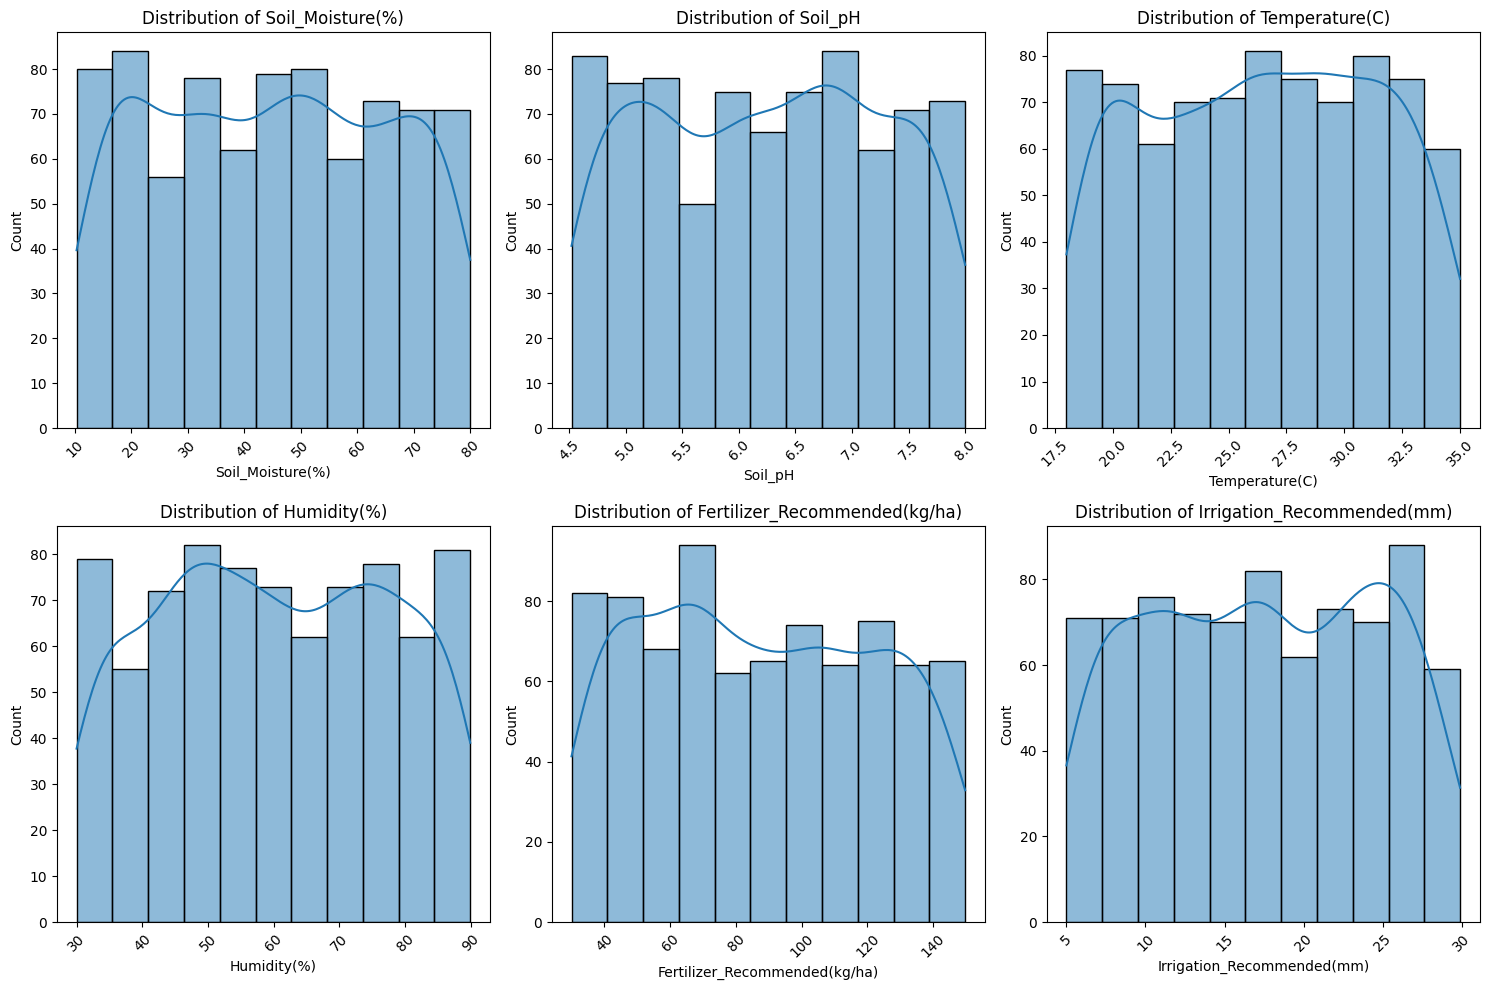

In [70]:
plt.figure(figsize=(15, 10))

numeric_cols = ['Soil_Moisture(%)', 'Soil_pH', 'Temperature(C)', 'Humidity(%)', 
               'Fertilizer_Recommended(kg/ha)', 'Irrigation_Recommended(mm)']
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df, x=df[col].astype(float), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


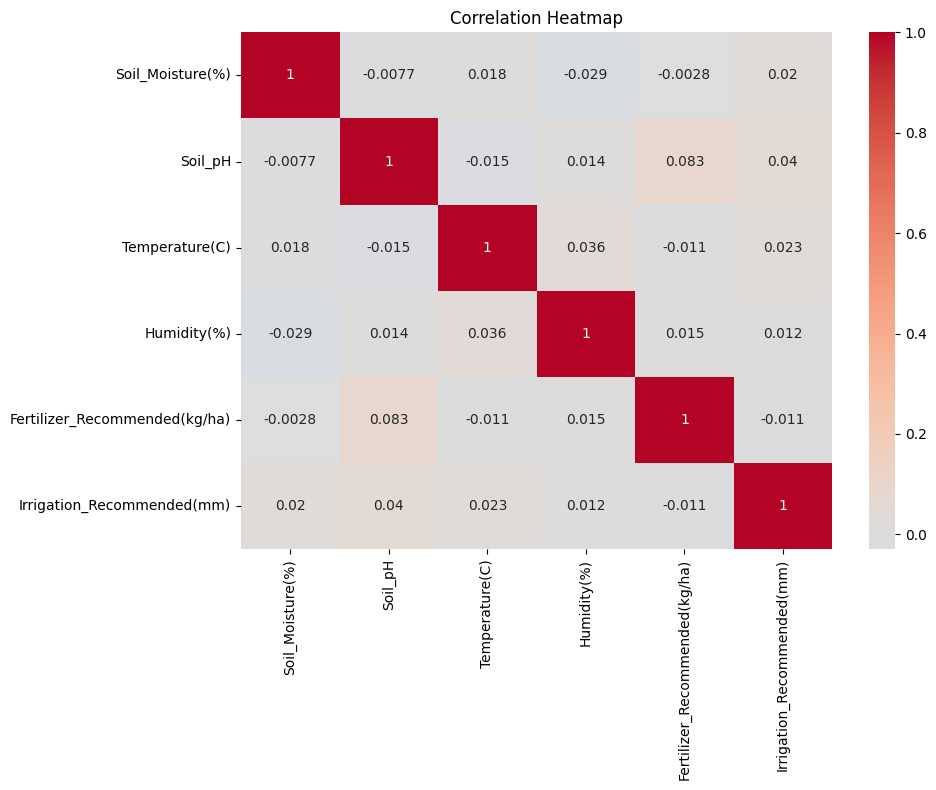

In [71]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[numeric_cols].astype(float).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

In [72]:
print("Factors Influencing Fertilizer Recommendations:")

df["Fertilizer_Recommended(kg/ha)"] = pd.to_numeric(
    df["Fertilizer_Recommended(kg/ha)"], errors="coerce"
)
fertilizer_correlations = (
    df[numeric_cols]
    .apply(pd.to_numeric, errors="coerce")
    .corrwith(df["Fertilizer_Recommended(kg/ha)"])
    .sort_values(ascending=False)
)

print("\nCorrelations with Fertilizer Recommendations:")
print(fertilizer_correlations)

df["Soil_Moisture(%)"] = pd.to_numeric(df["Soil_Moisture(%)"], errors="coerce")
avg_moisture_by_crop = (
    df.groupby("Crop_Type")["Soil_Moisture(%)"].mean().sort_values(ascending=False)
)

print("\nAverage Soil Moisture by Crop Type:")
print(avg_moisture_by_crop)

df["Temperature(C)"] = pd.to_numeric(df["Temperature(C)"], errors="coerce")
df["Irrigation_Recommended(mm)"] = pd.to_numeric(
    df["Irrigation_Recommended(mm)"], errors="coerce"
)

high_temp_data = df[df["Temperature(C)"] > 30]
irrigation_by_crop_temp = (
    high_temp_data.groupby("Crop_Type")["Irrigation_Recommended(mm)"]
    .agg(["mean", "count"])
    .round(2)
)

print("\nIrrigation Recommendations for Crops in High Temperature (>30°C):")
print(irrigation_by_crop_temp)

Factors Influencing Fertilizer Recommendations:

Correlations with Fertilizer Recommendations:
Fertilizer_Recommended(kg/ha)    1.000000
Soil_pH                          0.082782
Humidity(%)                      0.015420
Soil_Moisture(%)                -0.002751
Temperature(C)                  -0.010626
Irrigation_Recommended(mm)      -0.010808
dtype: float64

Average Soil Moisture by Crop Type:
Crop_Type
Wheat       47.181654
Maize       44.950933
Beans       44.335063
Tomatoes    44.182919
Lettuce     42.929364
Name: Soil_Moisture(%), dtype: float64

Irrigation Recommendations for Crops in High Temperature (>30°C):
            mean  count
Crop_Type              
Beans      17.86     52
Lettuce    16.30     37
Maize      16.63     55
Tomatoes   18.92     46
Wheat      18.81     35


In [73]:
cleaned_df = df.dropna()
cleaned_df.to_csv("cleaned_precision_agriculture_data.csv", index=False)
print("\nCleaned dataset exported as 'cleaned_precision_agriculture_data.csv'")


Cleaned dataset exported as 'cleaned_precision_agriculture_data.csv'


In [74]:
df.head()
# df.info()
df.describe()


,Soil_Moisture(%),Temperature(C),Fertilizer_Recommended(kg/ha),Irrigation_Recommended(mm)
count,794.000000,794.000000,794.000000,794.000000
mean,44.774563,26.469962,87.304816,17.401521
std,20.439031,4.856848,34.856073,7.149158
min,10.350000,18.000000,30.000000,5.000000
25%,26.970000,22.325000,57.350000,11.300000
50%,45.205000,26.600000,85.750000,17.401521
75%,62.642500,30.600000,117.600000,23.700000
max,79.980000,35.000000,149.700000,29.900000


# Key Insights and Recommendations from Agricultural Data Analysis

## Fertilizer Correlations
- Soil pH shows a weak positive correlation (0.08) with fertilizer recommendations
- Other environmental factors like humidity, soil moisture, and temperature have negligible correlations with fertilizer needs
- This suggests fertilizer recommendations are influenced mostly by the Soil Ph

## Soil Moisture Patterns
- Wheat crops maintain the highest average soil moisture levels (47.2%)
- Most crops have similar moisture levels ranging between 42-47%
- Lettuce shows slightly lower moisture levels compared to other crops

## High Temperature Irrigation Insights
- Tomatoes and wheat require the most irrigation (18.92mm and 18.81mm respectively) in high temperature conditions
- Lettuce needs the least irrigation (16.3mm) during hot weather
- Maize and beans have moderate irrigation requirements
- Recommendation: Increase irrigation monitoring for tomatoes and wheat during hot temperatures in the dry season

